# Sobel Filter for edege detection

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

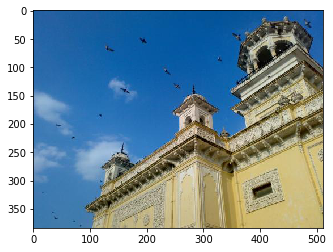

In [34]:
original = mpimg.imread('data/home.jpg')
plt.imshow(original)
plt.show()

In [33]:
original.shape

(563, 558, 3)

In [39]:
def get_distance(pixel,w=[1/3,1/3,1/3]):
    r,g,b = pixel[0],pixel[1],pixel[2]
    w0,w1,w2=w[0],w[1],w[2]
    return ((r**2)*w0+(g**2)*w1+(b**2)*w2)**0.5
def convert_RGB2GRAY(img,weights=[0.6,0.3,0.1]):
    m=img.shape[0]
    n=img.shape[1]
    gray_img = np.zeros((m,n),dtype=np.uint8)
    for i in range(m):
        for j in range(n):
            gray_img[i,j]=get_distance(img[i,j,:],weights)
    return gray_img

In [51]:
def sobel(grayimg):
    Gx = np.array([[-1,0,1],
                   [-5,0,5],
                   [-1,0,1]])
    Gy = np.array([[-1,-5,-1],
                   [0,0,0],
                   [1,5,1]])
    m = grayimg.shape[0]
    n = grayimg.shape[1]
    ret_img = np.zeros((m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            s1 = np.sum(Gx*grayimg[i-1:i+2,j-1:j+2])
            s2 = np.sum(Gy*grayimg[i-1:i+2,j+1:j+2])
            ret_img[i,j]=np.sqrt((s1**2)+(s2**2))
    return ret_img 

In [52]:
out_img = sobel(convert_RGB2GRAY(original))

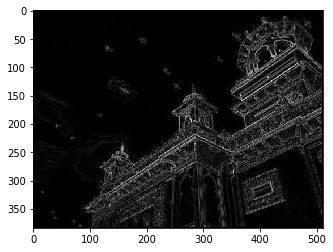

In [53]:
plt.imshow(out_img,cmap='gray')
plt.show()